In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data=pd.read_csv("D:\\ML project\\healthcare-dataset-stroke-data.csv")

In [85]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [89]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [90]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [91]:
data.bmi=data.bmi.fillna(28.893237)

Text(0.5, 1.0, 'percentage of people with strokes by gender')

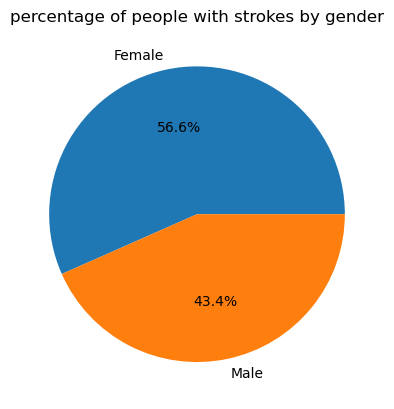

In [92]:
plt.pie(data['gender'][data['stroke']==1].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
plt.title('percentage of people with strokes by gender')

<Axes: xlabel='ever_married', ylabel='count'>

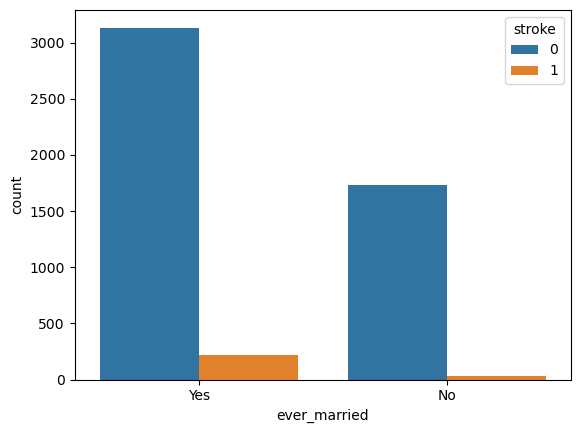

In [93]:
sns.countplot(data=data,x=data.ever_married,hue='stroke')

In [94]:
data.sample(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4744,163,Female,20.0,0,0,No,Private,Rural,94.67,28.8,Unknown,0
724,60983,Male,70.0,0,0,Yes,Private,Urban,64.41,29.4,smokes,0
2134,7384,Male,55.0,0,0,No,Self-employed,Rural,79.02,38.0,Unknown,0


<Axes: xlabel='gender', ylabel='count'>

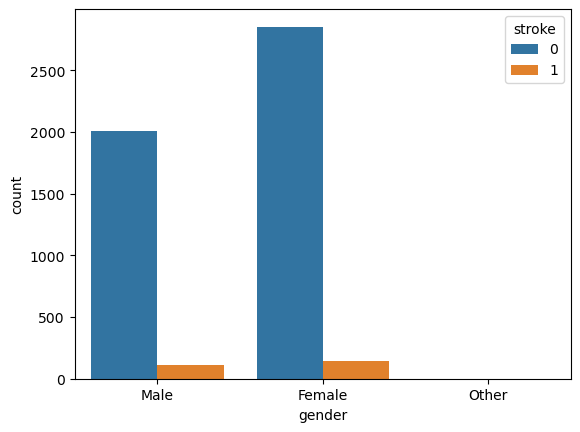

In [95]:
sns.countplot(x=data.gender,data=data,hue='stroke')

<Axes: xlabel='smoking_status', ylabel='count'>

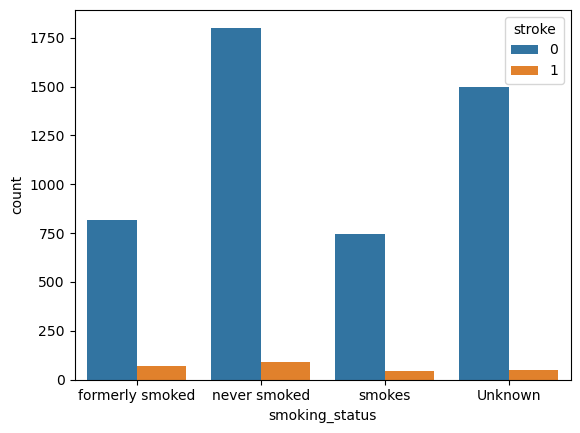

In [96]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

In [97]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

<Axes: xlabel='work_type', ylabel='count'>

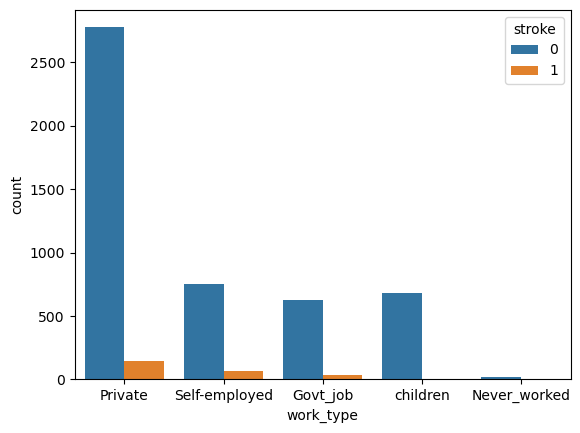

In [98]:
sns.countplot(data=data,x='work_type',hue='stroke')

In [100]:
x=[i for i in data if data[i].dtypes=='object']
x

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [101]:
data.gender=data.gender.map({'Male':0,'Female':1,'Other':2})
data.ever_married=data.ever_married.map({'Yes':1,'No':0})
data.work_type=data.work_type.map({'Never_worked':0,'children':1,'Private':2,'Self-employed':3,'Never_worked':4})
data.Residence_type=data.Residence_type.map({'Urban':1,'Rural':0})
data.smoking_status=data.smoking_status.map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

<Axes: >

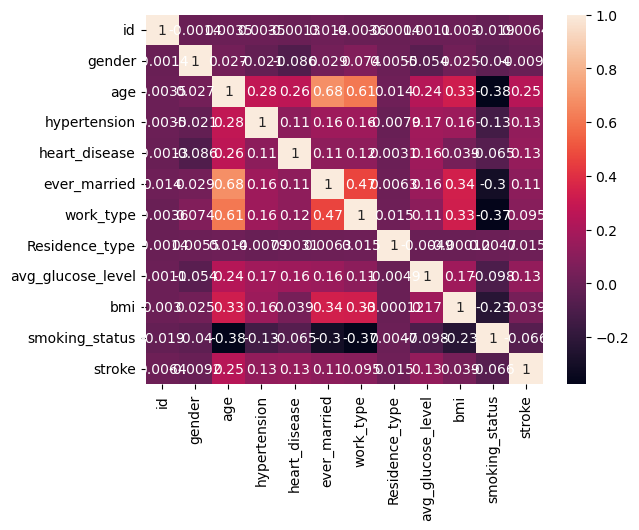

In [103]:
sns.heatmap(data.corr(),annot=True)

In [104]:
data.drop(['Residence_type','work_type','bmi','gender','id','smoking_status'],axis=1,inplace=True)
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,67.0,0,1,1,228.69,1
1,61.0,0,0,1,202.21,1
2,80.0,0,1,1,105.92,1
3,49.0,0,0,1,171.23,1
4,79.0,1,0,1,174.12,1
...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,0
5106,81.0,0,0,1,125.20,0
5107,35.0,0,0,1,82.99,0
5108,51.0,0,0,1,166.29,0


### Machine learinig

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [111]:
X=data.drop('stroke',axis=1)
Y=data['stroke']

In [112]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [113]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [114]:
Lg_model=LogisticRegression()

In [115]:
Lg_model.fit(X_train,Y_train)

LogisticRegression()

In [117]:
Lg_model.score(X_train,Y_train)

0.9515655577299413

In [118]:
Lg_model.score(x_test,y_test)

0.9500978473581213

In [119]:
Y_predict=Lg_model.predict(X_train)

In [120]:
mse=mean_squared_error(Y_train,Y_predict)
mse

0.048434442270058706